Задание 1. EDA
Вопросы:

Какова распределенность количества подписчиков на YouTube-каналы?

Есть ли зависимость между количеством подписчиков и количеством просмотров видео?

Как распределены типы каналов и какие категории наиболее популярны?

Как возраст канала (год и месяц создания) влияет на его успех (подписчики, просмотры)?

Какой средний уровень заработка у YouTube-каналов в зависимости от категории?

Есть ли зависимость между уровнем безработицы и количеством подписчиков в разных странах?


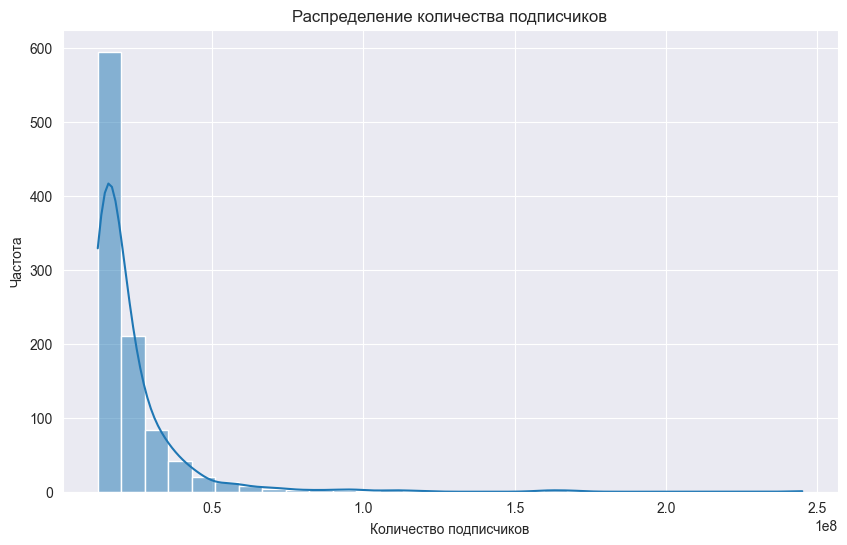

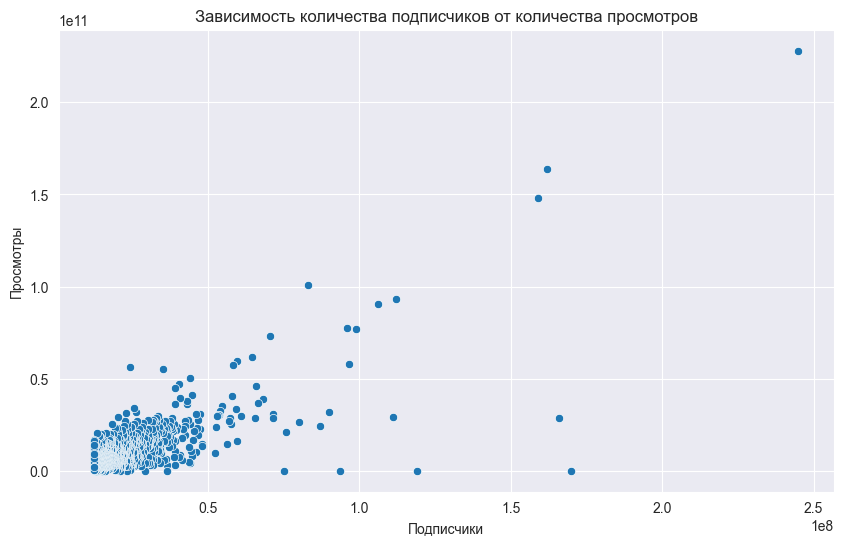

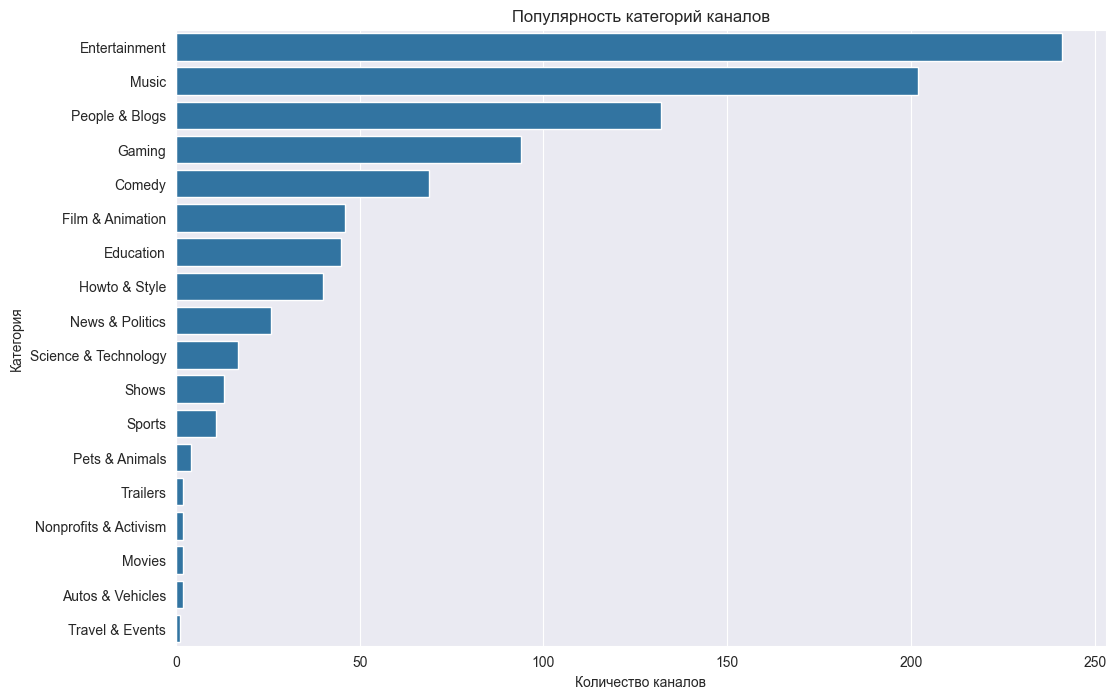

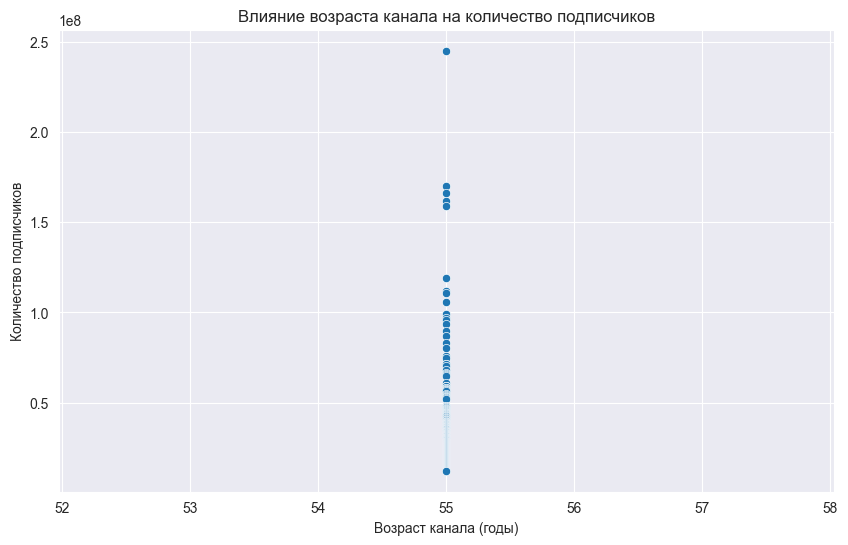

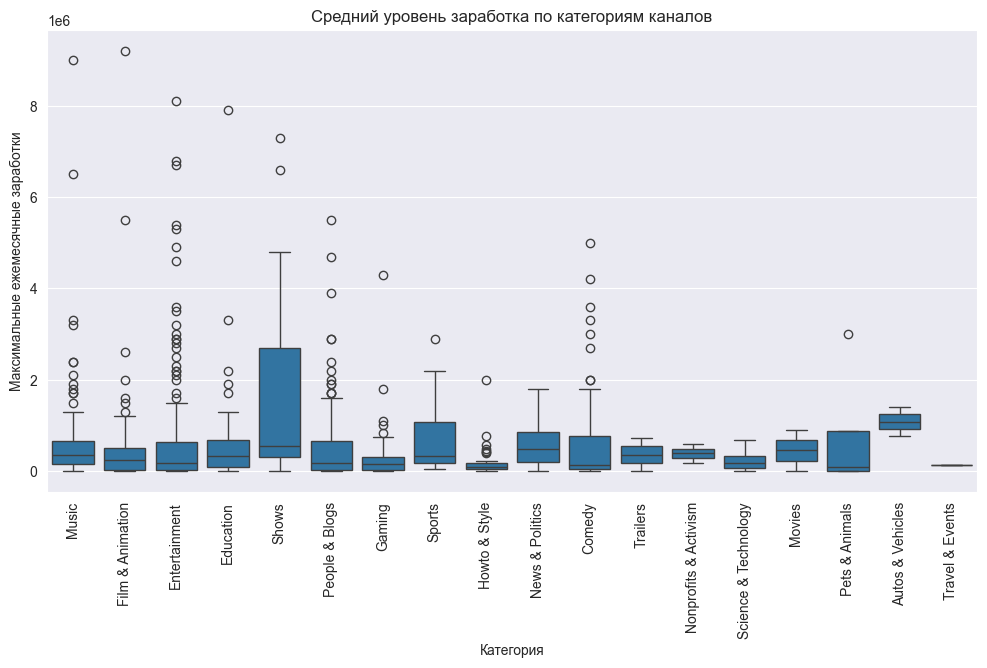

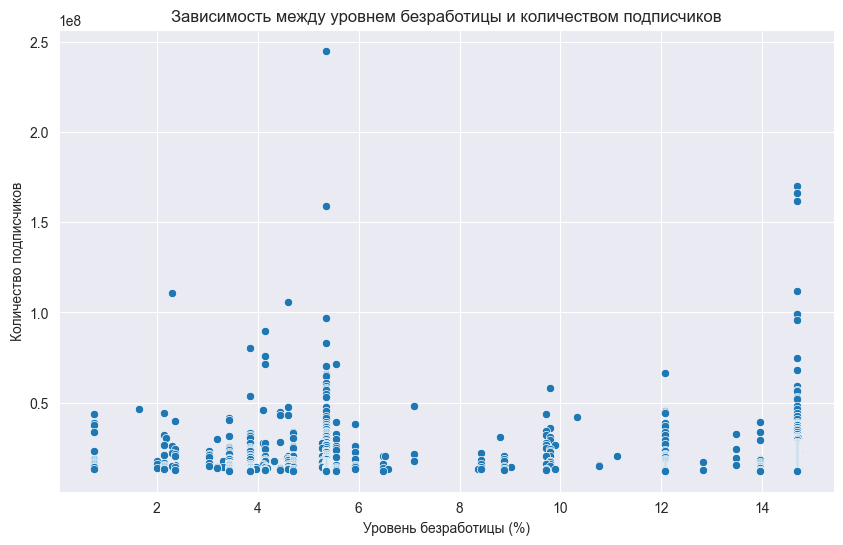

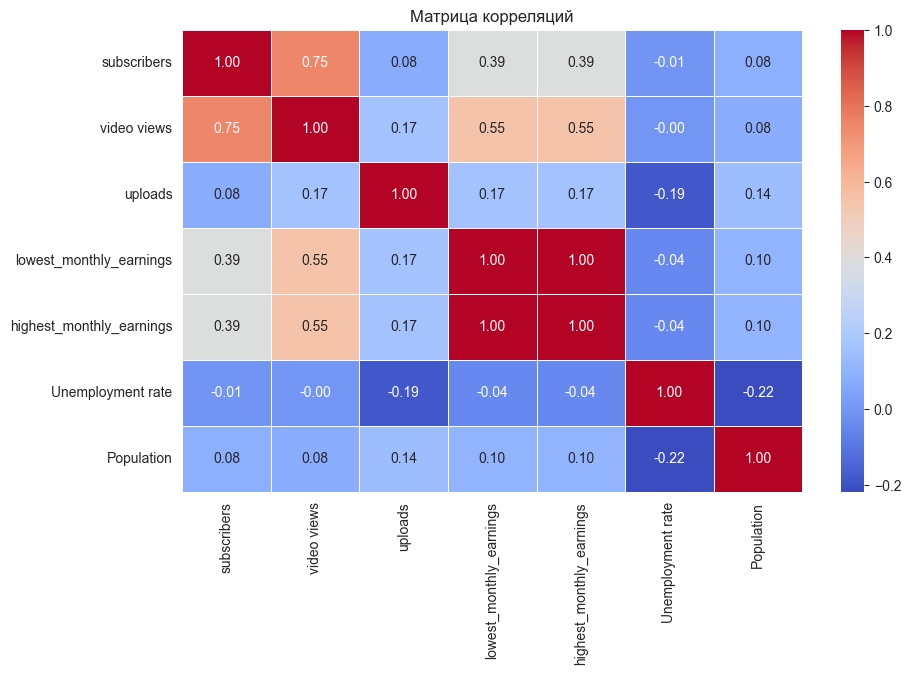

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Загружаем данные
data = pd.read_csv('youtube_data.csv', encoding='ISO-8859-1')

# 1. Распределение подписчиков
plt.figure(figsize=(10,6))
sns.histplot(data['subscribers'], bins=30, kde=True)
plt.title("Распределение количества подписчиков")
plt.xlabel("Количество подписчиков")
plt.ylabel("Частота")
plt.show()

# 2. Зависимость подписчиков и просмотров
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['subscribers'], y=data['video views'])
plt.title("Зависимость количества подписчиков от количества просмотров")
plt.xlabel("Подписчики")
plt.ylabel("Просмотры")
plt.show()

# 3. Популярность категорий
plt.figure(figsize=(12,8))
sns.countplot(y=data['category'], order=data['category'].value_counts().index)
plt.title("Популярность категорий каналов")
plt.xlabel("Количество каналов")
plt.ylabel("Категория")
plt.show()

# 4. Влияние возраста канала на подписчиков
data['created_date'] = pd.to_datetime(data['created_date'])
data['channel_age'] = (pd.to_datetime('today') - data['created_date']).dt.days // 365

plt.figure(figsize=(10,6))
sns.scatterplot(x=data['channel_age'], y=data['subscribers'])
plt.title("Влияние возраста канала на количество подписчиков")
plt.xlabel("Возраст канала (годы)")
plt.ylabel("Количество подписчиков")
plt.show()

# 5. Средний уровень заработка по категориям
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='highest_monthly_earnings', data=data)
plt.title("Средний уровень заработка по категориям каналов")
plt.xlabel("Категория")
plt.ylabel("Максимальные ежемесячные заработки")
plt.xticks(rotation=90)
plt.show()

# 6. Зависимость между уровнем безработицы и количеством подписчиков
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Unemployment rate'], y=data['subscribers'])
plt.title("Зависимость между уровнем безработицы и количеством подписчиков")
plt.xlabel("Уровень безработицы (%)")
plt.ylabel("Количество подписчиков")
plt.show()

# Матрица корреляций
correlation_matrix = data[['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'Unemployment rate', 'Population']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Матрица корреляций")
plt.show()


Задание 2. Корреляционный анализ

Оставьте два коррелирующих столбца: "subscribers" и"video views".

Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.

Рассчитайте коэффициент корреляции Пирсона.

Определите "video views" как признак Х, а "subscribers" - как целевую переменную.

Разделите выборку на тестовую и тренировочную.

Постройте модель линейной регрессии.

Рассчитайте точность модели на тестовой выборке.

Коэффициент корреляции Пирсона: 0.824261979786896
Среднеквадратичная ошибка на тестовой выборке: 8322329.038341659
Среднеквадратичная ошибка на тестовой выборке (с нулевыми просмотрами): 8421153.680744221


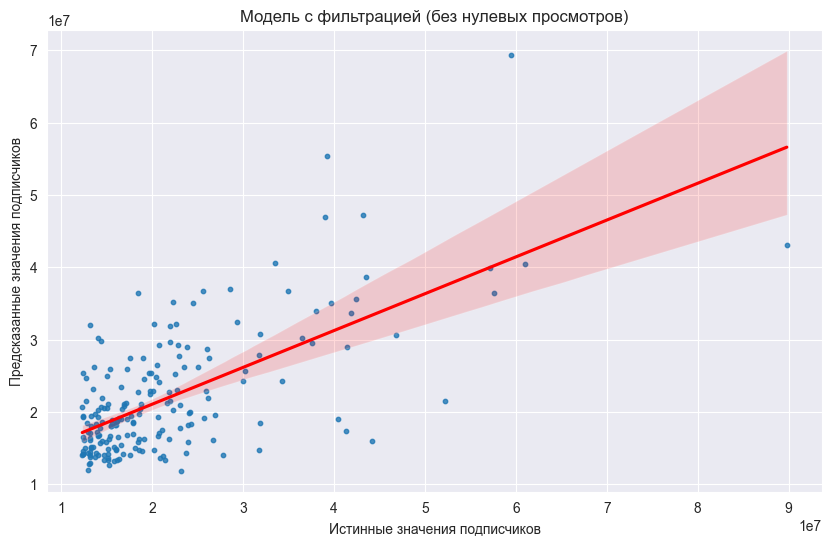

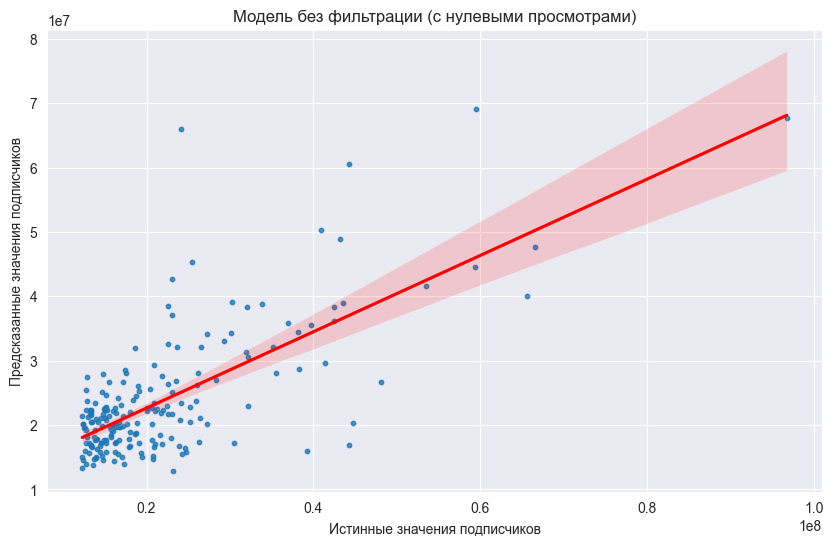

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем данные (если они еще не загружены)
data = pd.read_csv('youtube_data.csv', encoding='ISO-8859-1')

# 1. Отбираем только столбцы "subscribers" и "video views"
data_filtered = data[['subscribers', 'video views']]

# 2. Отфильтровываем строки, где количество просмотров равно нулю
data_filtered = data_filtered[data_filtered['video views'] > 0]

# 3. Рассчитываем коэффициент корреляции Пирсона
correlation = data_filtered['subscribers'].corr(data_filtered['video views'])
print(f"Коэффициент корреляции Пирсона: {correlation}")

# 4. Определяем X и y
X = data_filtered[['video views']]  # Признак
y = data_filtered['subscribers']  # Целевая переменная

# 5. Разделяем данные на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Строим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели - среднеквадратичная ошибка (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Корень из MSE
print(f"Среднеквадратичная ошибка на тестовой выборке: {rmse}")

# 7. Теперь попробуем без фильтрации данных (с нулевыми просмотрами)
data_unfiltered = data[['subscribers', 'video views']]

# Разделяем на X и y, включая нулевые просмотры
X_unfiltered = data_unfiltered[['video views']]
y_unfiltered = data_unfiltered['subscribers']

# Разделяем данные на тренировочную и тестовую выборку
X_train_unfiltered, X_test_unfiltered, y_train_unfiltered, y_test_unfiltered = train_test_split(X_unfiltered, y_unfiltered, test_size=0.2, random_state=42)

# Строим модель линейной регрессии
model_unfiltered = LinearRegression()
model_unfiltered.fit(X_train_unfiltered, y_train_unfiltered)

# Предсказания на тестовой выборке
y_pred_unfiltered = model_unfiltered.predict(X_test_unfiltered)

# Оценка модели - среднеквадратичная ошибка (MSE)
mse_unfiltered = mean_squared_error(y_test_unfiltered, y_pred_unfiltered)
rmse_unfiltered = mse_unfiltered ** 0.5  # Корень из MSE
print(f"Среднеквадратичная ошибка на тестовой выборке (с нулевыми просмотрами): {rmse_unfiltered}")

# Сравним визуально
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title("Модель с фильтрацией (без нулевых просмотров)")
plt.xlabel("Истинные значения подписчиков")
plt.ylabel("Предсказанные значения подписчиков")
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x=y_test_unfiltered, y=y_pred_unfiltered, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title("Модель без фильтрации (с нулевыми просмотрами)")
plt.xlabel("Истинные значения подписчиков")
plt.ylabel("Предсказанные значения подписчиков")
plt.show()


Задание 3. Классификация

Определите две самые популярные категории канала и отфильтруйте по ним набор данных.

В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]

Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.

Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.

Разделите выборку на тестовую и тренировочную, укажите random_state=13.`

Постройте модель логистической регрессии.

Рассчитайте точность модели на тестовой выборке.

Две самые популярные категории: ['Entertainment', 'Music']
Точность модели на тестовой выборке: 0.6842


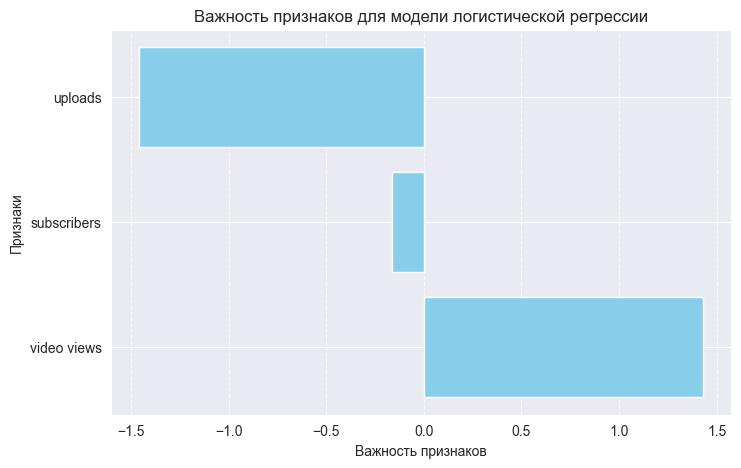

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Загружаем данные (если они еще не загружены)
df = pd.read_csv('youtube_data.csv', encoding='ISO-8859-1')

# Шаг 1: Подсчитаем количество каналов по каждой категории
category_counts = df['category'].value_counts()

# Шаг 2: Выберем две самые популярные категории
top_categories = category_counts.head(2)
print(f"Две самые популярные категории: {top_categories.index.tolist()}")

# Шаг 3: Фильтруем данные по этим категориям
filtered_data = df[df['category'].isin(top_categories.index)]

# Шаг 4: Убираем строки с нулевым количеством просмотров
filtered_data = filtered_data[filtered_data['video views'] > 0]

# Шаг 5: Кодируем целевую переменную (category) с помощью LabelEncoder
label_encoder = LabelEncoder()
filtered_data['category_encoded'] = label_encoder.fit_transform(filtered_data['category'])

# Шаг 6: Определяем признаки и целевую переменную
X = filtered_data[['video views', 'subscribers', 'uploads']]
y = filtered_data['category_encoded']

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 7: Разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=13)

# Шаг 8: Строим модель логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Шаг 9: Прогнозируем на тестовой выборке
y_pred = model.predict(X_test)

# Шаг 10: Рассчитываем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.4f}")

# Шаг 11: Для визуализации можно отобразить важность признаков
feature_importance = model.coef_[0]
features = X.columns

# Визуализация важности признаков
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков для модели логистической регрессии')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
